In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/household_power_consumption.txt', \
                   sep=';', \
                   na_values='?', \
                   low_memory=False)

In [3]:
data = pd.read_csv(
    '../data/household_power_consumption.txt',
    sep=';',
    header=0,           # make sure first row is treated as header
    na_values='?',      # missing values are '?'
    low_memory=False,   # prevents dtype warnings
    encoding='utf-8'    # ensures proper character decoding
)

# check first few columns
print(data.columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [4]:
# Combine Date and Time into one datetime column
data['Datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'], 
    format='%d/%m/%Y %H:%M:%S'
)

# Set Datetime as index
data.set_index('Datetime', inplace=True)

# Drop old columns to avoid confusion
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Confirm changes
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
# Check for missing values
print("Missing values before:", data.isnull().sum().sum())

# Fill missing values using forward-fill (copy previous value)
data.ffill(inplace=True)


print("Missing values after:", data.isnull().sum().sum())

Missing values before: 181853
Missing values after: 0


In [8]:
print(data.columns.tolist())


['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [12]:
data = data.asfreq('1min')  # or your frequency


In [17]:
# Daily average
daily_data = data.resample('D').mean()

# Display first few rows
daily_data.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


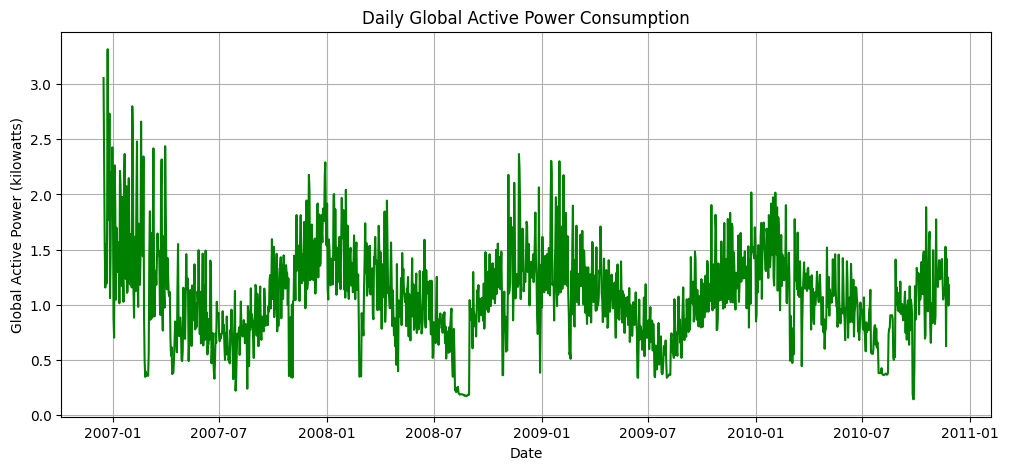

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_data.index, daily_data['Global_active_power'], color='green')
plt.title('Daily Global Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


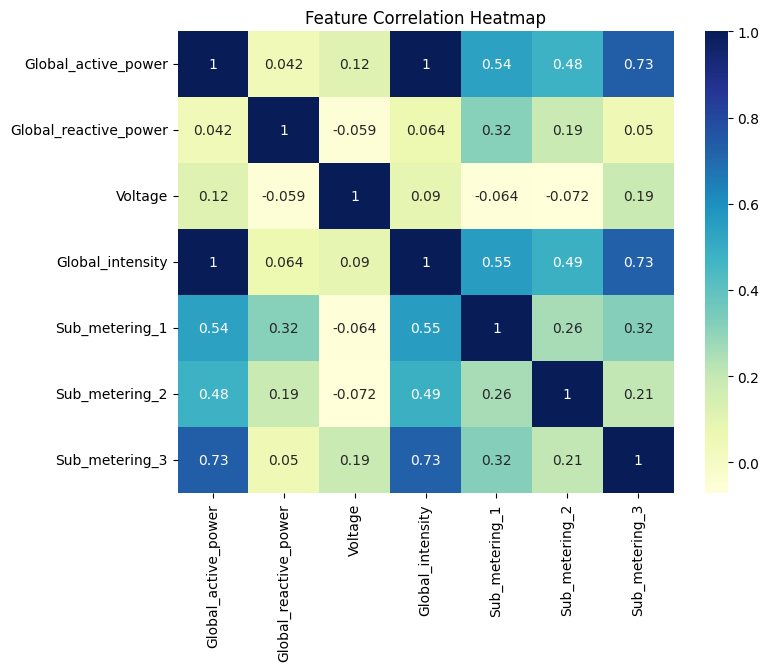

In [22]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(daily_data.corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation Heatmap')
plt.show()


In [23]:
daily_data.to_csv('../data/cleaned_energy_data.csv')
print("✅ Cleaned dataset saved successfully.")


✅ Cleaned dataset saved successfully.


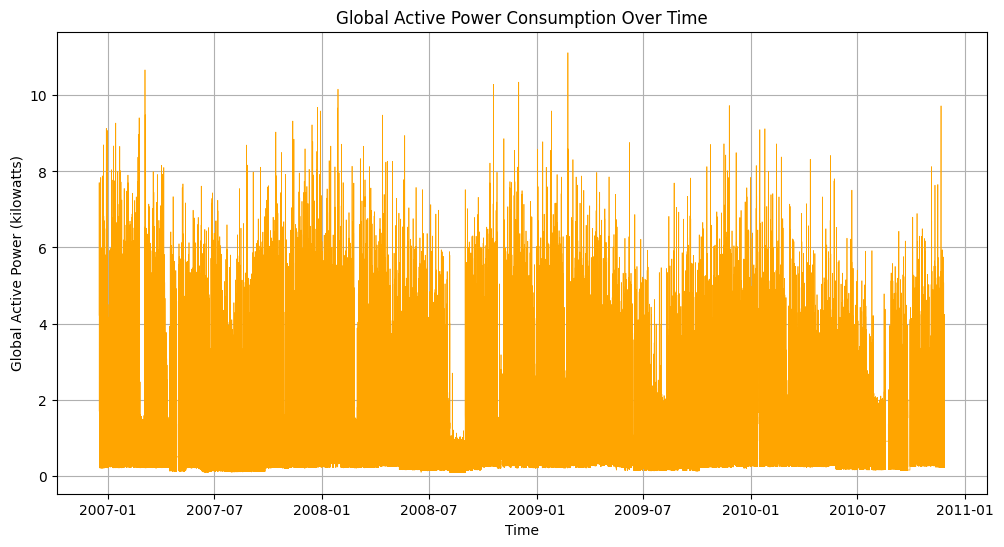

/Users/darshanr/SmartLoad-AI/notebooks/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


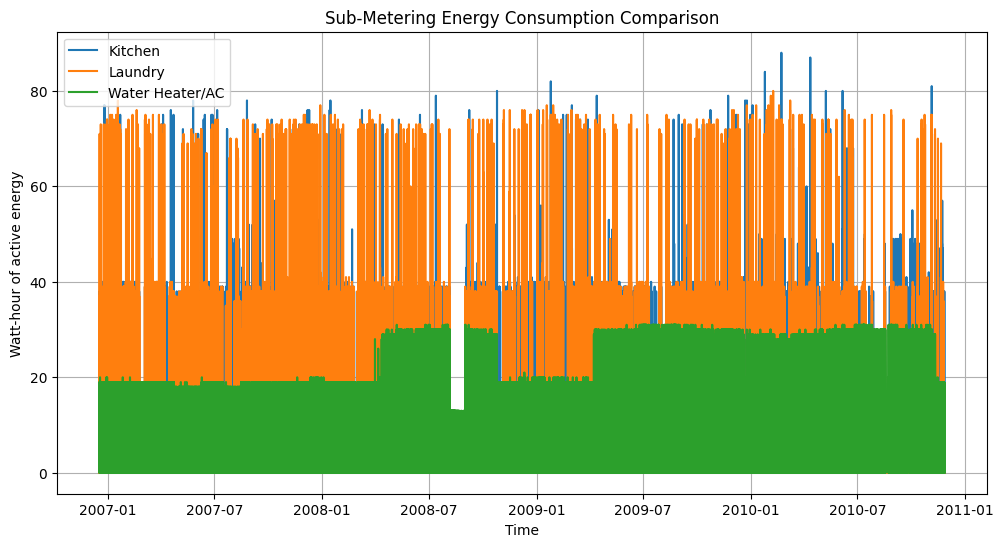

In [24]:
import matplotlib.pyplot as plt

# Plot global active power over time
plt.figure(figsize=(12,6))
plt.plot(data['Global_active_power'], color='orange', linewidth=0.5)
plt.title('Global Active Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

# Plot sub-metering comparison
plt.figure(figsize=(12,6))
plt.plot(data['Sub_metering_1'], label='Kitchen')
plt.plot(data['Sub_metering_2'], label='Laundry')
plt.plot(data['Sub_metering_3'], label='Water Heater/AC')
plt.legend()
plt.title('Sub-Metering Energy Consumption Comparison')
plt.xlabel('Time')
plt.ylabel('Watt-hour of active energy')
plt.grid(True)
plt.show()
